<a href="https://colab.research.google.com/github/ikhdaaakmalia/VisionAgriPi-YOLO-Based-Plant-Pest-Detection/blob/main/EDA_VISION_AGRI_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
## Plant Pest Detection Dataset

This notebook presents an exploratory data analysis of the plant pest image dataset used in the VisionAgri-Pi project.
The objective of this analysis is to understand dataset structure, class distribution, image characteristics, and annotation properties that may influence object detection performance.


## Dataset Overview

- Total images: ~5,000
- Number of classes: 8 plant pest categories
- Data source: Roboflow
- Annotation format: YOLO
- Dataset split:
  - Training: 70%
  - Validation: 20%
  - Testing: 10%

The dataset consists of annotated plant pest images collected and managed using Roboflow to ensure consistent labeling and dataset versioning.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
LABEL_DIR = "/content/drive/MyDrive/capstone/dataset_deteksi/train/labels"

labels = []

for file in os.listdir(LABEL_DIR):
    if file.endswith(".txt"):
        with open(os.path.join(LABEL_DIR, file), "r") as f:
            for line in f:
                cls, x, y, w, h = map(float, line.split())
                labels.append([int(cls), x, y, w, h])

df = pd.DataFrame(labels, columns=["class_id", "x", "y", "width", "height"])
df.head()

,class_id,x,y,width,height
0,0,0.462,0.740000,0.364,0.349333
1,0,0.467,0.409412,0.362,0.569412
2,0,0.514,0.462462,0.648,0.444444
3,0,0.463,0.357333,0.802,0.714667
4,0,0.482,0.519947,0.356,0.247340


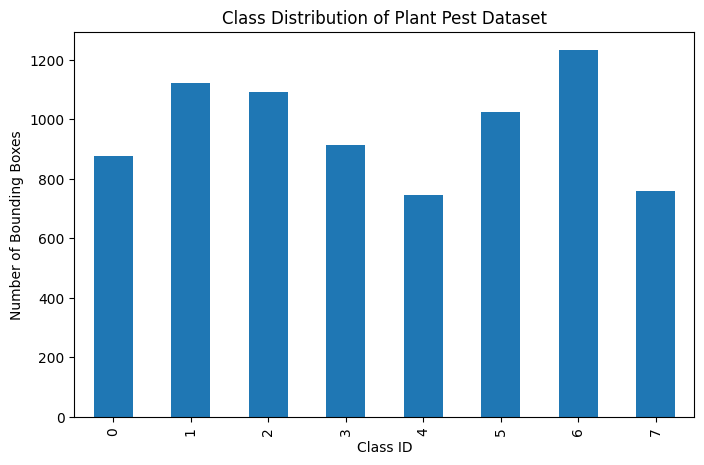

In [3]:
class_counts = df["class_id"].value_counts().sort_index()

class_counts.plot(kind="bar")
plt.title("Class Distribution of Plant Pest Dataset")
plt.xlabel("Class ID")
plt.ylabel("Number of Bounding Boxes")
plt.show()

### Class Distribution Analysis

The dataset shows an imbalanced class distribution, where some pest categories contain significantly more samples than others.
This imbalance may bias the detection model toward majority classes and reduce recall on underrepresented pests.
Therefore, data augmentation was considered during training to mitigate this issue.

In [4]:
object_per_image = []

for file in os.listdir(LABEL_DIR):
    if file.endswith(".txt"):
        with open(os.path.join(LABEL_DIR, file)) as f:
            object_per_image.append(len(f.readlines()))

pd.Series(object_per_image).describe()

,0
count,5319.000000
mean,1.459861
std,2.441538
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,76.000000


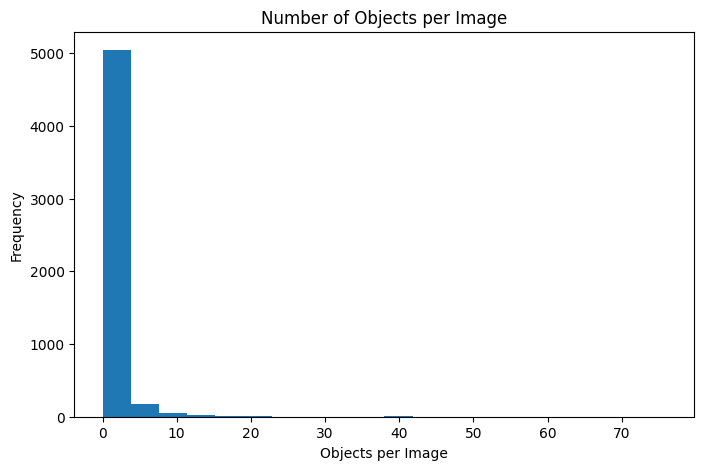

In [5]:
plt.hist(object_per_image, bins=20)
plt.title("Number of Objects per Image")
plt.xlabel("Objects per Image")
plt.ylabel("Frequency")
plt.show()

Most images contain a small number of pest objects, indicating that the dataset is relatively sparse.
This characteristic reduces object overlap but may increase false negatives, especially for small pest instances.

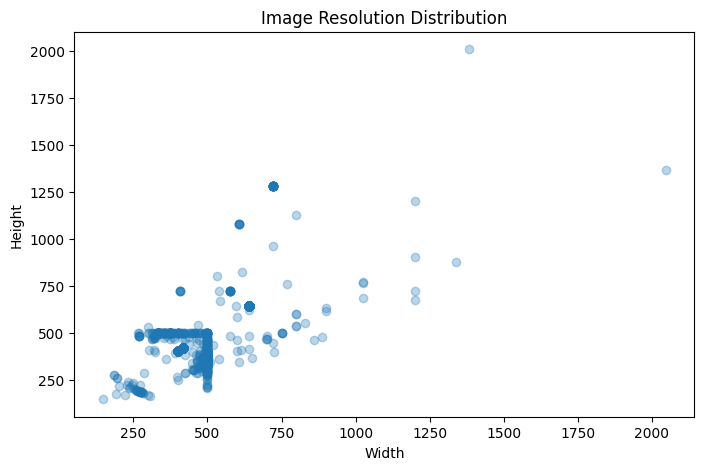

In [6]:
IMAGE_DIR = "/content/drive/MyDrive/capstone/dataset_deteksi/train/images"

widths, heights = [], []

for img_file in os.listdir(IMAGE_DIR):
    img = Image.open(os.path.join(IMAGE_DIR, img_file))
    widths.append(img.size[0])
    heights.append(img.size[1])

plt.scatter(widths, heights, alpha=0.3)
plt.title("Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

Image resolutions vary across the dataset, which may affect the consistency of feature extraction.
This variation justifies image resizing and normalization during preprocessing.

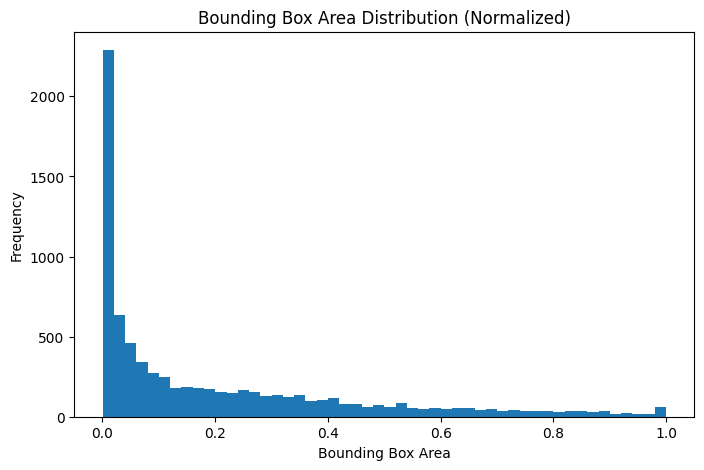

In [7]:
df["bbox_area"] = df["width"] * df["height"]

plt.hist(df["bbox_area"], bins=50)
plt.title("Bounding Box Area Distribution (Normalized)")
plt.xlabel("Bounding Box Area")
plt.ylabel("Frequency")
plt.show()

Most bounding boxes occupy a small portion of the image area, indicating that pest objects are generally small.
This characteristic explains the difficulty in achieving high mAP scores, particularly at higher IoU thresholds.

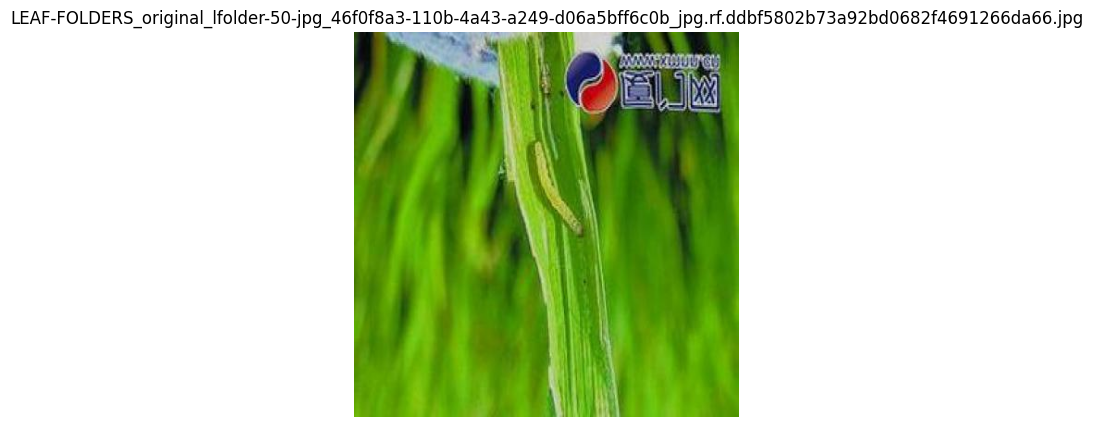

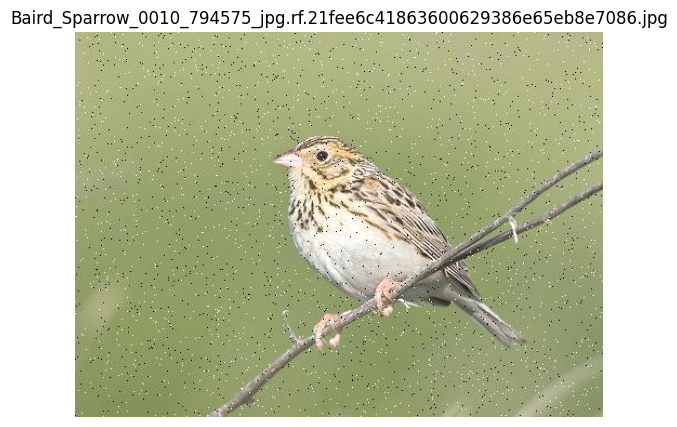

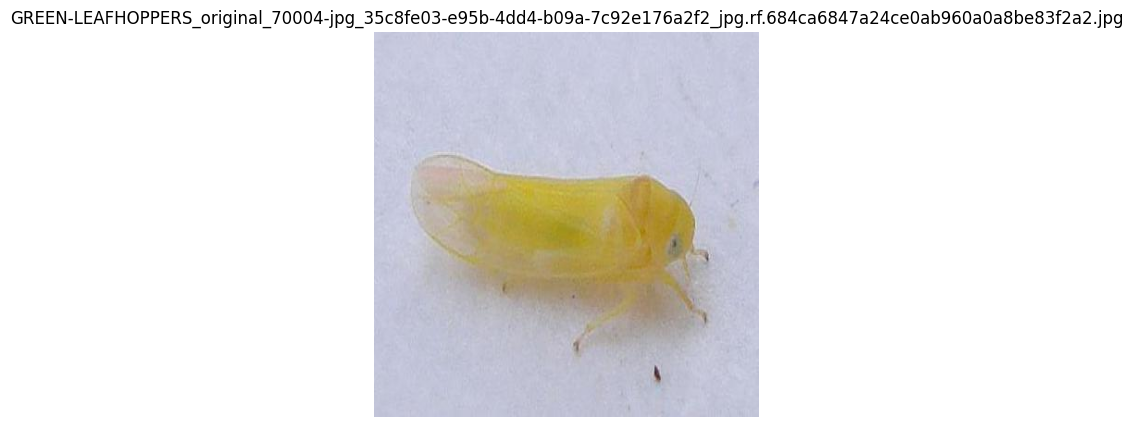

In [9]:
import random

sample_images = random.sample(os.listdir(IMAGE_DIR), 3)

for img_name in sample_images:
    img = Image.open(os.path.join(IMAGE_DIR, img_name))
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)
    plt.show()

### Data Quality Check

A manual inspection of sample images and annotations indicates that bounding boxes are consistently placed and aligned with target objects.
No corrupted files or missing labels were observed in the inspected samples.

## EDA Summary

- The dataset exhibits moderate class imbalance across pest categories.
- Pest objects are predominantly small relative to image size.
- Image resolution varies across samples.
- Most images contain a limited number of pest objects.
- These characteristics explain the observed challenges in detection performance and motivate the use of YOLOv8, data augmentation, and loss function tuning.